In [1]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 导入数据
categories = ['alt.atheism',
              'rec.sport.hockey',
              'comp.graphics',
              'sci.crypt',
              'comp.os.ms-windows.misc',
              'sci.electronics',
              'comp.sys.ibm.pc.hardware',
              'sci.med',
              'comp.sys.mac.hardware',
              'sci.space',
              'comp.windows.x',
              'soc.religion.christian',
              'misc.forsale',
              'talk.politics.guns',
              'rec.autos' 
              'talk.politics.mideast',
              'rec.motorcycles',
              'talk.politics.misc',
              'rec.sport.baseball',
              'talk.religion.misc']
# 导入训练数据
train_path = '20news-bydate-train'
dataset_train = load_files(container_path=train_path, categories=categories)
# 导入评估数据
test_path = '20news-bydate-test'
dataset_test = load_files(container_path=test_path, categories=categories)

In [2]:
# 文本特征提取

# 计算词频
count_vect = CountVectorizer(stop_words='english', decode_error='ignore')
X_train_counts = count_vect.fit_transform(dataset_train.data)
# 查看数据维度
X_train_counts.shape

(10156, 122402)

In [3]:
# 计算TF-IDF
tf_transformer = TfidfVectorizer(stop_words='english', decode_error='ignore')
X_train_counts_tf = tf_transformer.fit_transform(dataset_train.data)
# 查看数据维度
X_train_counts_tf.shape

(10156, 122402)

In [4]:
# 评估算法

# 设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'

# 生成算法模型
models = {}
models['LR'] = LogisticRegression()
models['SVM'] = SVC()
models['CART'] = DecisionTreeClassifier()
models['MNB'] = MultinomialNB()
models['KNN'] = KNeighborsClassifier()

# 比较算法
results = []
for key in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(models[key], X_train_counts_tf, dataset_train.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))


LR : 0.901636 (0.010638)
SVM : 0.047658 (0.004797)
CART : 0.663943 (0.015156)
MNB : 0.880760 (0.006831)
KNN : 0.797163 (0.011413)


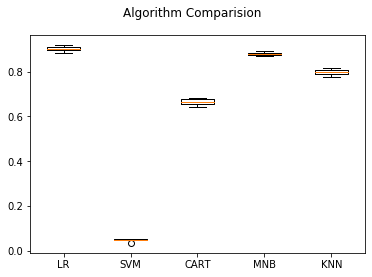

In [5]:
# 箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

In [6]:
# 算法调参
# 调参LR
param_grid = {}
param_grid['C'] = [0.1, 5, 13, 15]
model = LogisticRegression()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

最优 : 0.9251673887357227 使用 {'C': 13}


In [7]:
# 调参MNB
param_grid = {}
param_grid['alpha'] = [0.001, 0.01, 0.1, 1.5]
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

最优 : 0.9165025600630169 使用 {'alpha': 0.01}


In [8]:
# 集成算法
ensembles = {}
ensembles['RF'] = RandomForestClassifier()
ensembles['AB'] = AdaBoostClassifier()

# 比较集成算法
results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(ensembles[key], X_train_counts_tf, dataset_train.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))

RF : 0.735429 (0.018955)
AB : 0.558783 (0.011644)


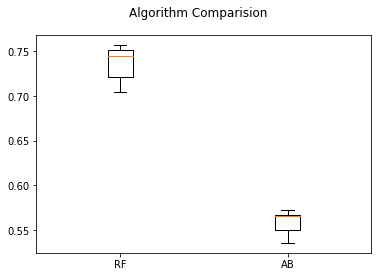

In [9]:
# 箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()

In [10]:
# 调参RF
param_grid = {}
param_grid['n_estimators'] = [10, 100, 150, 200]
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

最优 : 0.8713076014178811 使用 {'n_estimators': 200}


In [11]:
# 生成模型
model = LogisticRegression(C=13)
model.fit(X_train_counts_tf, dataset_train.target)
X_test_counts = tf_transformer.transform(dataset_test.data)
predictions = model.predict(X_test_counts)
print(accuracy_score(dataset_test.target, predictions))
print(classification_report(dataset_test.target, predictions))

0.8448224852071006
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       319
           1       0.74      0.80      0.77       389
           2       0.77      0.74      0.76       394
           3       0.71      0.74      0.73       392
           4       0.81      0.85      0.83       385
           5       0.86      0.77      0.81       395
           6       0.83      0.91      0.87       390
           7       0.97      0.97      0.97       398
           8       0.91      0.94      0.92       397
           9       0.96      0.97      0.96       399
          10       0.96      0.93      0.94       396
          11       0.79      0.79      0.79       393
          12       0.91      0.88      0.89       396
          13       0.90      0.92      0.91       394
          14       0.86      0.94      0.89       398
          15       0.75      0.92      0.83       364
          16       0.87      0.61      0.71       310
        